In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# définition les noms des colonnes
colonnes = ['target', 'ids', 'date', 'flag', 'user', 'text']

In [3]:
# Ouverture du fichier
data_full = pd.read_csv("./data/training.1600000.processed.noemoticon.csv", encoding='ISO-8859-1', header=None, names=colonnes)

In [4]:
import pandas as pd
import re

# Liste de mots-clés spécifiques au domaine de l'aviation
# Liste améliorée de mots-clés spécifiques au domaine de l'aviation
keywords = [
    'flight', 'airline', 'plane', 'airport', 'boarding', 'delay', 'baggage', 
    'crew', 'steward', 'check-in', 'boarding pass', 'gate', 'luggage', 'landed'
    'overbooked', 'turbulence', 'landing', 'takeoff', 'in-flight', 'cabin crew', 
    'air hostess', 'air steward', 'seatbelt', 'emergency exit', 'runway', 
    'air traffic control', 'lost baggage', 'missed connection', 'upgrade', 
    'frequent flyer', 'mileage', 'layover', 'diverted', 'grounded'
]

# Construire une expression régulière pour correspondre uniquement aux mots entiers
pattern = r'\b(?:' + '|'.join(keywords) + r')\b'

# Filtrer les tweets contenant les mots-clés
data_filtered = data_full[data_full['text'].str.contains(pattern, case=False, na=False, regex=True)]

# Exclure les tweets contenant des mots indésirables
exclude_pattern = r'\b(?:screwed|screw)\b'
data_filtered = data_filtered[~data_filtered['text'].str.contains(exclude_pattern, case=False, na=False, regex=True)]

# Sauvegarder les tweets filtrés dans un nouveau fichier CSV
data_filtered.to_csv('./filtered_tweets.csv', index=False)

# Nombre de tweets spécifiques au domaine des voyages aériens
print("Le dataset contient", data_filtered.shape[0], "tweets relatifs au transport aérien")


Le dataset contient 9460 tweets relatifs au transport aérien


In [5]:
import pandas as pd

# Supposons que votre DataFrame s'appelle 'data'
# Filtrer les lignes avec target=0 et target=4
target_0 = data_filtered[data_filtered['target'] == 0]
target_4 = data_filtered[data_filtered['target'] == 4]

# Trouver le nombre minimum de lignes entre les deux groupes
min_count = min(len(target_0), len(target_4))

# Échantillonner un nombre égal de lignes de chaque groupe
sampled_target_0 = target_0.sample(n=min_count, random_state=42)
sampled_target_4 = target_4.sample(n=min_count, random_state=42)

# Combiner les échantillons
data = pd.concat([sampled_target_0, sampled_target_4])

# Nombre de tweets spécifiques au domaine des voyages aériens
print("Le dataset équilibré contient", data.shape[0], "tweets")

Le dataset équilibré contient 6588 tweets


In [6]:
# Ajuster la largeur maximale des colonnes
pd.set_option('display.max_colwidth', None)
data.sample(20)

,target,ids,date,flag,user,text
1506438,4,2169479648,Sun Jun 14 14:34:20 PDT 2009,NO_QUERY,pesdebug,"Launch will delay by at least one week, the weather was just too fine not to go out this weekend."
1494112,4,2069638515,Sun Jun 07 16:14:52 PDT 2009,NO_QUERY,AnaVinhas,@dougiemcfly Dougiiiiiiieee Percy don't deserve to be grounded he offered us here in Brazil great nights...don't do that
275239,0,1990764724,Mon Jun 01 05:41:21 PDT 2009,NO_QUERY,sarez89,feels so bad for the missing plane xo
1115710,4,1973006473,Sat May 30 10:17:53 PDT 2009,NO_QUERY,lorifacia,@teaii we are in school until June 18th. I'll be on a plane on the 20th.
1426891,4,2059299171,Sat Jun 06 16:39:07 PDT 2009,NO_QUERY,wyilow,Watch me on TV tonight: IADT Runway Show - 10pm EST on MoreTV32.
778947,0,2322811180,Wed Jun 24 23:19:17 PDT 2009,NO_QUERY,ashnastyy,@rodx2024 with no plans for the rest of my summer cuz I'm grounded ughh LOL only thing I can do is sneak people over during the day now.
620058,0,2228195205,Thu Jun 18 14:08:13 PDT 2009,NO_QUERY,arturot,"Flight delayed one more hour... Stuck on the runway, blame on Boston's weather. Oh well more time to email/work"
14961,0,1553925244,Sat Apr 18 15:35:17 PDT 2009,NO_QUERY,KatieVanBeek,Time to go to le airport
833103,4,1557699080,Sun Apr 19 05:34:24 PDT 2009,NO_QUERY,michelllexox,getting ready/ airport/ jamaica
951559,4,1824267756,Sun May 17 00:40:28 PDT 2009,NO_QUERY,GillClough,"Since tweeting about my lost luggage, now followed by co-founder of Trace Me Luggage Trackers. Now if only I'd known about this before"


In [7]:
print("Exemples de tweets négatifs")
display(data[data["target"] == 0]["text"])

Exemples de tweets négatifs


364415    Bought a book to read on the plane. &quot;Smashed&quot;. So far, it sounds an awful lot like my childhood. I may not be able to get thru it. 
61776                                                                Waiting at the airport with the hubby this morning. 1 hour till his flight leaves 
307389                                                         OH WOW FAIL. My thoughts are with all those of the Air France flight and their families 
764377                                                                                                         Off to the airport!  Dallas here I come!
337691       Broke my iPhone tonight from slipping pedals landing on the seat from a tailwhip. my phone was in my back pocket.  iPhones are shitty!!!!!
                                                                              ...                                                                      
326176                                                            CNN: Brazil confirms p

In [8]:
print("Exemples de tweets positifs")
display(data[data["target"] == 4]["text"])

Exemples de tweets positifs


1549419                                                                                                       has free airline money to spend.. yay! 
1568381    @lilyroseallen You must be really tired from all that flying and listening to children screaming. You deserve to have your own plane. LOL 
1550095                 @dhempe, just saw your question, sorry for the delay! I can give you a coupon code for a free guide! DM me with your details 
1278372                                                                            @LisaLavie next time he should give out free plane tickets aswell 
1392424                                                                          About to board my 1st flight to St. Louis. Trying not to be nervous 
                                                                              ...                                                                    
1069056                                                          I'm chillen at the airport waiting 

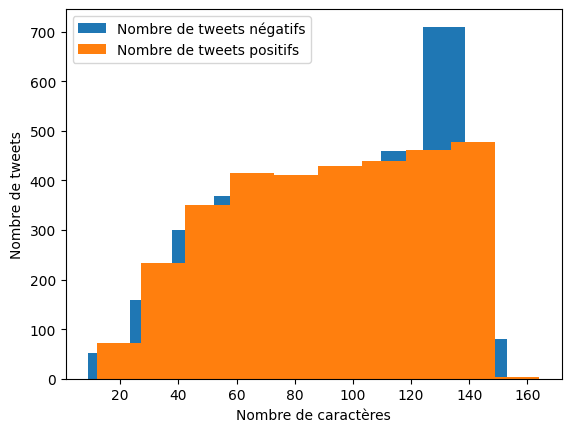

In [9]:
# Longueur des tweets
length_text_pos = data[data["target"] == 4]["text"].str.len()
length_text_neg = data[data["target"] == 0]["text"].str.len() 
plt.hist(length_text_neg, label="Nombre de tweets négatifs") 
plt.hist(length_text_pos, label="Nombre de tweets positifs") 
plt.xlabel("Nombre de caractères")
plt.ylabel("Nombre de tweets")
plt.legend() 
plt.show()

Ce sont des contenus typiques de tweets: citation (@), liens, utilisation d'abbréviations et de variations d'orthographe, ponctuation pour exprimer les sentiments <br>


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6588 entries, 364415 to 1570686
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  6588 non-null   int64 
 1   ids     6588 non-null   int64 
 2   date    6588 non-null   object
 3   flag    6588 non-null   object
 4   user    6588 non-null   object
 5   text    6588 non-null   object
dtypes: int64(2), object(4)
memory usage: 360.3+ KB


In [11]:
data.nunique()

target       2
ids       6582
date      6543
flag         1
user      6279
text      6562
dtype: int64

In [12]:
print(data.isna().sum())

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64


In [13]:
for col in data.columns:
    n = data.duplicated(subset=col).sum()
    print(f'col : {col} -> duplicated : {n}')

col : target -> duplicated : 6586
col : ids -> duplicated : 6
col : date -> duplicated : 45
col : flag -> duplicated : 6587
col : user -> duplicated : 309
col : text -> duplicated : 26


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Trouver les doublons basés sur la colonne 'ids'
duplicates = data[data.duplicated(subset=['ids'], keep=False)]
display(duplicates.sort_values(by="ids"))

# Groupby sur 'ids' et additionner les valeurs de 'target'
grouped_data = duplicates.groupby('ids')['target'].sum().reset_index()

# Afficher les valeurs uniques de la colonne 'target'
unique_values = grouped_data['target'].unique()
print("Valeurs uniques de la colonne 'target' :", unique_values)


,target,ids,date,flag,user,text
42578,0,1676160753,Fri May 01 21:15:30 PDT 2009,NO_QUERY,littletigr,@aneetasee no not after that plane ticket BUT I'm super excited to see the fam after three years
859693,4,1676160753,Fri May 01 21:15:30 PDT 2009,NO_QUERY,littletigr,@aneetasee no not after that plane ticket BUT I'm super excited to see the fam after three years
235348,0,1979765929,Sun May 31 04:25:06 PDT 2009,NO_QUERY,lasic,"@jabogan LOL, why creepy? ok with me... bummer, school Moodle is down prob'ly due to upgrade at DET this w'end - back Tue, sorry"
1164524,4,1979765929,Sun May 31 04:25:06 PDT 2009,NO_QUERY,lasic,"@jabogan LOL, why creepy? ok with me... bummer, school Moodle is down prob'ly due to upgrade at DET this w'end - back Tue, sorry"
316351,0,2002387780,Tue Jun 02 04:03:52 PDT 2009,NO_QUERY,SilviaEmilia,"flying back to Germany today..already miss home feels like I am going to cry until boarding time...well, see u tomorrow"
1287627,4,2002387780,Tue Jun 02 04:03:52 PDT 2009,NO_QUERY,SilviaEmilia,"flying back to Germany today..already miss home feels like I am going to cry until boarding time...well, see u tomorrow"
379890,0,2052444682,Sat Jun 06 00:45:08 PDT 2009,NO_QUERY,ReMisterGeneral,@ChrissyMBot no tetleys at the airport I shall have to sample 'american breakfast tea'. Heaven forbid
1382193,4,2052444682,Sat Jun 06 00:45:08 PDT 2009,NO_QUERY,ReMisterGeneral,@ChrissyMBot no tetleys at the airport I shall have to sample 'american breakfast tea'. Heaven forbid
442028,0,2067161979,Sun Jun 07 11:51:35 PDT 2009,NO_QUERY,Morenah08,"I'll go Skate Boarding Down My House! But...I'm sad, One person isn't with me now! s2"
1481909,4,2067161979,Sun Jun 07 11:51:35 PDT 2009,NO_QUERY,Morenah08,"I'll go Skate Boarding Down My House! But...I'm sad, One person isn't with me now! s2"


Valeurs uniques de la colonne 'target' : [4]


En faisant la somme des target sur les lignes en doublons on a uniquement la valeur "4" ce qui veut dire que c'est le résultat de 0+4 donc ce sont des tweets qui sont identiques mais ont été jugés à la fois positifs et négatifs, autant les supprimer.

In [15]:
# Trouver les doublons basés sur toutes les colonnes sauf 'target'
duplicates = data[data.duplicated(subset=['ids', 'date', 'flag', 'user', 'text'], keep=False)]

# Supprimer les doublons
data = data.drop(duplicates.index)

In [16]:
# Trouver les doublons basés sur les colonnes date, flag, user, text, et target
duplicates_text_target = data[data.duplicated(subset=['date', 'flag', 'user', 'text', 'target'], keep=False)]
data = data.drop_duplicates(subset=['date', 'flag', 'user', 'text', 'target'], keep='first')
duplicates_text_target

,target,ids,date,flag,user,text
291475,0,1995715901,Mon Jun 01 13:56:04 PDT 2009,NO_QUERY,carolsantini,well i'm feeling sad for the family of who were in Air France plane that disappear im so sorry !
291477,0,1995715937,Mon Jun 01 13:56:04 PDT 2009,NO_QUERY,carolsantini,well i'm feeling sad for the family of who were in Air France plane that disappear im so sorry !
1418769,4,2057837639,Sat Jun 06 13:45:25 PDT 2009,NO_QUERY,PastorJonCannon,"Monitor at Chicago aiport says my flight to Raliegh, NC is &quot;on time&quot; - pray that it stays that way!"
1418768,4,2057837598,Sat Jun 06 13:45:25 PDT 2009,NO_QUERY,PastorJonCannon,"Monitor at Chicago aiport says my flight to Raliegh, NC is &quot;on time&quot; - pray that it stays that way!"


In [17]:
# Trouver les doublons basés sur les colonnes flag, user, text
duplicates_text_user = data[data.duplicated(subset=['flag', 'user', 'text'], keep=False)]
duplicates_text_user

,target,ids,date,flag,user,text
1372325,4,2051242027,Fri Jun 05 21:17:51 PDT 2009,NO_QUERY,PatrickAnna,http://www.twitpic.com/48mky Anna &amp; her brother Albert enjoying the view while flying without a plane...
1386767,4,2052865326,Sat Jun 06 02:19:45 PDT 2009,NO_QUERY,PatrickAnna,On the plane flying higher to jump! http://short.to/dlnc
1454778,4,2063355857,Sun Jun 07 02:19:41 PDT 2009,NO_QUERY,PatrickAnna,On the plane flying higher to jump! http://short.to/dlnc
1446052,4,2062459855,Sat Jun 06 23:17:39 PDT 2009,NO_QUERY,PatrickAnna,http://www.twitpic.com/48mky Anna &amp; her brother Albert enjoying the view while flying without a plane...
1202739,4,1985909234,Sun May 31 18:00:16 PDT 2009,NO_QUERY,PatrickAnna,Anna and her brother Albert were about to jump out of the plane... http://twitpic.com/3i493
858086,4,1574066791,Tue Apr 21 04:06:41 PDT 2009,NO_QUERY,PatrickAnna,Anna and her brother Albert were about to jump out of the plane... http://twitpic.com/3i493
845589,4,1564251142,Mon Apr 20 02:33:09 PDT 2009,NO_QUERY,PatrickAnna,On the plane flying higher to jump! http://twitpic.com/3i44g
846153,4,1564349281,Mon Apr 20 03:03:08 PDT 2009,NO_QUERY,PatrickAnna,On the plane flying higher to jump! http://twitpic.com/3i44g


In [18]:
# Groupby sur 'ids' et additionner les valeurs de 'target'
grouped_data = duplicates_text_user.groupby('text')['target'].sum().reset_index()

# Afficher les valeurs uniques de la colonne 'target'
unique_values = grouped_data['target'].unique()
print("Valeurs uniques de la colonne 'target' :", unique_values)

Valeurs uniques de la colonne 'target' : [8]


Certains messages sont répétés un grand nombre de fois, ça peut fausser l'analyse.

In [19]:
# Supprimer les doublons
data = data.drop(duplicates_text_user.index)

In [20]:
# Trouver les doublons basés sur les colonnes text
duplicates_text = data[data.duplicated(subset=['text'], keep=False)]
duplicates_text

,target,ids,date,flag,user,text
307389,0,2000460643,Mon Jun 01 22:09:58 PDT 2009,NO_QUERY,rachelslott,OH WOW FAIL. My thoughts are with all those of the Air France flight and their families
319656,0,2003104662,Tue Jun 02 05:53:18 PDT 2009,NO_QUERY,houseplanet,AIR FRANCE FLIGHT 447 --Brazilian Air Force confirms a plane seat was found 650km NE of Fernando de Noronha
202006,0,1972027290,Sat May 30 08:24:29 PDT 2009,NO_QUERY,jediabe,On my way to the airport
14963,0,1553925555,Sat Apr 18 15:35:18 PDT 2009,NO_QUERY,Andrestwoo,Grounded
233890,0,1979467276,Sun May 31 03:10:20 PDT 2009,NO_QUERY,BeebaDiva,On my way to the airport
770027,0,2301851016,Tue Jun 23 15:59:59 PDT 2009,NO_QUERY,benbrochill,Going to mcdonalds. I miss annet and the crew.
770066,0,2301863291,Tue Jun 23 16:00:51 PDT 2009,NO_QUERY,Adolfh71,Going to mcdonalds. I miss annet and the crew.
319863,0,2003152114,Tue Jun 02 05:59:15 PDT 2009,NO_QUERY,jacobowsky,AIR FRANCE FLIGHT 447 --Brazilian Air Force confirms a plane seat was found 650km NE of Fernando de Noronha
401717,0,2057746687,Sat Jun 06 13:35:05 PDT 2009,NO_QUERY,123fund,At the airport.
475933,0,2177742119,Mon Jun 15 06:37:38 PDT 2009,NO_QUERY,zacharypatchan,on the way to the airport


In [21]:
# Groupby sur 'text' et calculer l'écart type sur les valeurs de 'target'
grouped_data = duplicates_text_user.groupby('text')['target'].std().reset_index()

In [22]:
grouped_data.target.unique()

array([0.])

Text(0.5, 1.0, 'Histogramme des valeurs de Target et de leurs fréquences')

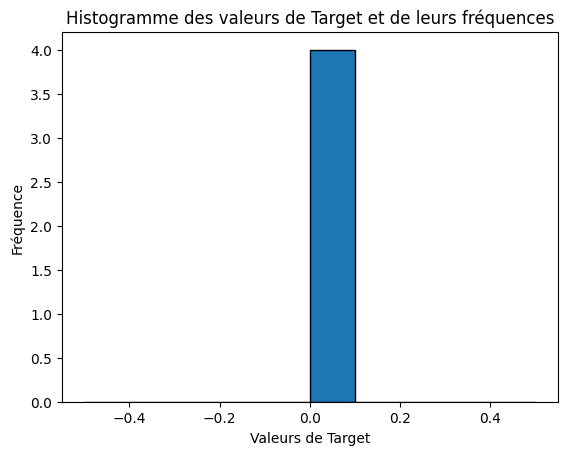

In [23]:
import matplotlib.pyplot as plt

# Créer un histogramme des valeurs de grouped_data.target
plt.hist(grouped_data['target'], bins=10, edgecolor='black')

# Ajouter des labels et un titre
plt.xlabel('Valeurs de Target')
plt.ylabel('Fréquence')
plt.title('Histogramme des valeurs de Target et de leurs fréquences')

In [24]:
# Filtrer les textes dans grouped_data où target n'est pas nul
non_zero_texts = grouped_data[grouped_data['target'] != 0]['text']

# Supprimer les lignes dans data où 'text' est dans non_zero_texts
data = data[~data['text'].isin(non_zero_texts)]

La valeur de 4 porte à confusion, on va changer pour 1

In [25]:
# Remplacer la valeur 4 par 1 dans la colonne 'target'
data['target'] = data['target'].replace(4, 1)

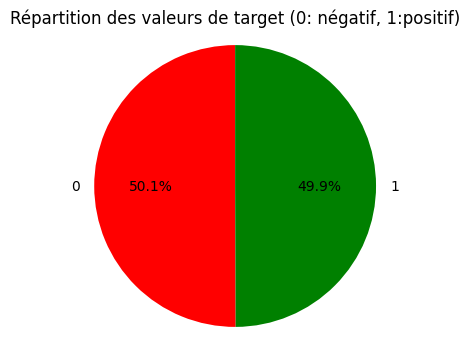

In [26]:
# Répartition des valeurs de la colonne 'target'
repartition_target = data['target'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(repartition_target, labels=repartition_target.index, autopct='%1.1f%%', colors=['red', 'green'], startangle=90)
plt.title('Répartition des valeurs de target (0: négatif, 1:positif)')
plt.axis('equal')  # Pour s'assurer que le pie chart est bien circulaire
plt.show()

## Problématique métier
Le client demande de détecter les bad buzz, lors de l'appréciation de performance du modèle les faux positifs seront plus pénalisants que les faux négatifs. On s'appuiera donc sur la mesure de précision.<br>

## Exploration et nettoyage du vocabulaire

### Détection de la langue

In [27]:
# pip install spacy-langdetect
# ! pip install tqdm

In [28]:
import pandas as pd
import spacy
from spacy_langdetect import LanguageDetector
from spacy.language import Language
from tqdm import tqdm

# Fonction pour ajouter le détecteur de langue à spaCy
def get_lang_detector(nlp, name):
    return LanguageDetector()

# Charger le modèle de langue anglais
nlp = spacy.load("en_core_web_sm")

# Vérifiez si l'usine existe déjà
if "language_detector" not in nlp.pipe_names:
    Language.factory("language_detector", func=get_lang_detector)
    nlp.add_pipe('language_detector', last=True)

# Fonction pour détecter la langue
def detect_language(text):
    doc = nlp(text)
    return doc._.language['language']

# Appliquer la détection de langue avec une barre de progression
tqdm.pandas()  # Activer tqdm pour les pandas DataFrame
data['language'] = data['text'].progress_apply(detect_language)
data = data[data['language'] == 'en']

# Supprimer la colonne 'language' si elle n'est plus nécessaire
data = data.drop(columns=['language'])

data.shape


100%|██████████████████████████████████████| 6566/6566 [00:34<00:00, 188.03it/s]


(6467, 6)

In [29]:
# Sauvegarder le DataFrame data
data.to_csv('./data/data_preprocessed.csv', index=False)

# data = pd.read_csv('./data/data_preprocessed.csv')

### Nettoyage (adapté aux tweets)

In [30]:
%time
import os
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
import numpy as np
import pandas as pd
import sklearn

# Libraries and packages for text (pre-)processing 
import string
import re
import nltk

print("Python version:", sys.version)
print("Version info.:", sys.version_info)
print("pandas version:", pd.__version__)
print("numpy version:", np.__version__)
print("skearn version:", sklearn.__version__)
print("re version:", re.__version__)
print("nltk version:", nltk.__version__)

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

CPU times: user 2 μs, sys: 0 ns, total: 2 μs
Wall time: 4.77 μs
Python version: 3.11.9 (main, Apr 19 2024, 16:48:06) [GCC 11.2.0]
Version info.: sys.version_info(major=3, minor=11, micro=9, releaselevel='final', serial=0)
pandas version: 2.1.4
numpy version: 1.26.4
skearn version: 1.4.2
re version: 2.2.1
nltk version: 3.9.1


#### Données

Nous allons tester nos fonctions sur quelques lignes sélectionnées au hasard

In [31]:
import random

# Choisir dix indices au hasard
random_indices = random.sample(range(len(data)), 10)

# Créer un DataFrame avec les lignes sélectionnées
data_sample = data.iloc[random_indices]

# Afficher les lignes sélectionnées pour vérification
pd.set_option('display.max_colwidth', None)
display(data_sample)

,target,ids,date,flag,user,text
1241213,1,1993970556,Mon Jun 01 11:12:35 PDT 2009,NO_QUERY,epiphanygirl,rt: @TheKempire @epiphanygirl Ummm I don't like that! LOL &lt;--yuck-a-ronamo!!! right? im on a plane now ttyl
832945,1,1557679624,Sun Apr 19 05:28:38 PDT 2009,NO_QUERY,dianarowland,@TinaGerow Yes I am! I figured there had to be someone else on the same flight
945745,1,1822429694,Sat May 16 19:33:31 PDT 2009,NO_QUERY,ohtobeMel,@FakerLoveJuice i know...i know....cant keep up with him... I forget im with the clean up crew!!!
1584635,1,2190584685,Tue Jun 16 03:08:55 PDT 2009,NO_QUERY,Kelliekk,@anna8687 im in mmarketing a project manager. I work for an airline/wholesaler and im currently working on their brochures Hopefully
1434087,1,2060563860,Sat Jun 06 19:08:31 PDT 2009,NO_QUERY,childlikemuffin,"and I'm off.. Gonna go around the airport. Got nothing to do here at the lounge. Later, loves!"
1560479,1,2186343355,Mon Jun 15 18:42:15 PDT 2009,NO_QUERY,cardinmckinney,"Finally on our plane 2 Nashville. Traveling w/ the flu is such a nasty experience. However, Park City was delightful. Home, here I come!"
1086569,1,1969332700,Fri May 29 23:42:29 PDT 2009,NO_QUERY,hollywoodshorts,@SoCalMovieFans SCMF crew Meet N' Greet &amp; screens The #Hangover @ Burbank - Come join us @wbpictures - http://bit.ly/Ir4Gc
721137,0,2261102360,Sat Jun 20 20:15:57 PDT 2009,NO_QUERY,scottyjohnson48,@LMWspeaks i was about to watch it on the flight home but the planes audio was messed up
1326233,1,2015233755,Wed Jun 03 04:05:37 PDT 2009,NO_QUERY,blueflameit,Off to the airport to fly a plane solo again first have to drop daughter off at her new school...
480002,0,2179094087,Mon Jun 15 08:38:09 PDT 2009,NO_QUERY,dobianchi,Gauging from the wait at security at san diego lindbergh field airport I'd say we're losing the war on terrror.


In [32]:
import spacy

# Tokenisation avec Spacy# Charger le modèle de langue
nlp = spacy.load('en_core_web_sm')

# Tokeniser les textes
data_sample['tokens'] = data_sample['text'].apply(lambda x: [token.text for token in nlp(x)])

# Afficher les lignes sélectionnées et tokenisées pour vérification
pd.set_option('display.max_colwidth', None)
display(data_sample)

,target,ids,date,flag,user,text,tokens
1241213,1,1993970556,Mon Jun 01 11:12:35 PDT 2009,NO_QUERY,epiphanygirl,rt: @TheKempire @epiphanygirl Ummm I don't like that! LOL &lt;--yuck-a-ronamo!!! right? im on a plane now ttyl,"[rt, :, @TheKempire, @epiphanygirl, Ummm, I, do, n't, like, that, !, LOL, , &, lt;--yuck, -, a, -, ronamo, !, !, !, right, ?, i, m, on, a, plane, now, , ttyl]"
832945,1,1557679624,Sun Apr 19 05:28:38 PDT 2009,NO_QUERY,dianarowland,@TinaGerow Yes I am! I figured there had to be someone else on the same flight,"[@TinaGerow, Yes, I, am, !, I, figured, there, had, to, be, someone, else, on, the, same, flight]"
945745,1,1822429694,Sat May 16 19:33:31 PDT 2009,NO_QUERY,ohtobeMel,@FakerLoveJuice i know...i know....cant keep up with him... I forget im with the clean up crew!!!,"[@FakerLoveJuice, i, know, ..., i, know, ...., cant, keep, up, with, him, ..., , I, forget, i, m, with, the, clean, up, crew, !, !, !, ]"
1584635,1,2190584685,Tue Jun 16 03:08:55 PDT 2009,NO_QUERY,Kelliekk,@anna8687 im in mmarketing a project manager. I work for an airline/wholesaler and im currently working on their brochures Hopefully,"[@anna8687, i, m, in, mmarketing, a, project, manager, ., I, work, for, an, airline, /, wholesaler, and, i, m, currently, working, on, their, brochures, , Hopefully]"
1434087,1,2060563860,Sat Jun 06 19:08:31 PDT 2009,NO_QUERY,childlikemuffin,"and I'm off.. Gonna go around the airport. Got nothing to do here at the lounge. Later, loves!","[and, I, 'm, off, .., Gon, na, go, around, the, airport, ., Got, nothing, to, do, here, at, the, lounge, ., Later, ,, loves, !]"
1560479,1,2186343355,Mon Jun 15 18:42:15 PDT 2009,NO_QUERY,cardinmckinney,"Finally on our plane 2 Nashville. Traveling w/ the flu is such a nasty experience. However, Park City was delightful. Home, here I come!","[Finally, on, our, plane, 2, Nashville, ., Traveling, w/, the, flu, is, such, a, nasty, experience, ., However, ,, Park, City, was, delightful, ., , Home, ,, here, I, come, !]"
1086569,1,1969332700,Fri May 29 23:42:29 PDT 2009,NO_QUERY,hollywoodshorts,@SoCalMovieFans SCMF crew Meet N' Greet &amp; screens The #Hangover @ Burbank - Come join us @wbpictures - http://bit.ly/Ir4Gc,"[@SoCalMovieFans, SCMF, crew, Meet, N, ', Greet, &, amp, ;, screens, The, #, Hangover, @, Burbank, -, Come, join, us, , @wbpictures, -, http://bit.ly/Ir4Gc]"
721137,0,2261102360,Sat Jun 20 20:15:57 PDT 2009,NO_QUERY,scottyjohnson48,@LMWspeaks i was about to watch it on the flight home but the planes audio was messed up,"[@LMWspeaks, i, was, about, to, watch, it, on, the, flight, home, but, the, planes, audio, was, messed, up]"
1326233,1,2015233755,Wed Jun 03 04:05:37 PDT 2009,NO_QUERY,blueflameit,Off to the airport to fly a plane solo again first have to drop daughter off at her new school...,"[Off, to, the, airport, to, fly, a, plane, solo, again, , first, have, to, drop, daughter, off, at, her, new, school, ...]"
480002,0,2179094087,Mon Jun 15 08:38:09 PDT 2009,NO_QUERY,dobianchi,Gauging from the wait at security at san diego lindbergh field airport I'd say we're losing the war on terrror.,"[Gauging, from, the, wait, at, security, at, san, diego, lindbergh, field, airport, I, 'd, say, we, 're, losing, the, war, on, terrror, .]"


In [33]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

# Assurez-vous d'avoir téléchargé les ressources nécessaires
# nltk.download('punkt')

def count_total_tokens(data_sample, col):
    total_tokens = 0
    for text in data_sample[col]:
        tokens = word_tokenize(text)
        total_tokens += len(tokens)
    print("Nombre total de tokens :", total_tokens)
    return total_tokens

[nltk_data] Downloading package punkt_tab to /home/cecile/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [34]:
count_total_tokens(data_sample, "text")

Nombre total de tokens : 240


240

#### Fonctions

In [35]:
def remove_URL(text):
    """
        Remove URLs from a sample string
    """
    return re.sub(r"https?://\S+|www\.\S+", "", text)

In [36]:
# Appliquer la fonction remove_URL et stocker le résultat dans une nouvelle colonne
data_sample['cleaned_text'] = data_sample['text'].apply(remove_URL)

# Afficher les textes d'origine et les textes modifiés (en bleu)
from IPython.display import display, HTML

def display_texts(data_sample, col1, col2):
    html = ""
    for original, cleaned in zip(data_sample[col1], data_sample[col2]):
        html += f"<p>Original: {original}<br>Modifié: <span style='color:blue'>{cleaned}</span></p>"
    display(HTML(html))

display_texts(data_sample, "text", "cleaned_text")

In [37]:
def remove_mentions(text):
    """
    Remove mentions (words starting with @) from a sample string
    """
    return re.sub(r"@\w+", "", text)

In [38]:
# Appliquer la fonction remove_URL et stocker le résultat dans une nouvelle colonne
data_sample['cleaned_text2'] = data_sample['cleaned_text'].apply(remove_mentions)

display_texts(data_sample, "cleaned_text", "cleaned_text2")

In [39]:
def reduce_repetitions(text):
    """
    Reduce character repetitions in a sample string
    """
    return re.sub(r'(.)\1{2,}', r'\1\1', text)

In [40]:
# Appliquer la fonction remove_URL et stocker le résultat dans une nouvelle colonne
data_sample['cleaned_text3'] = data_sample['cleaned_text2'].apply(reduce_repetitions)

display_texts(data_sample, "text", "cleaned_text3")

In [41]:
import re

def other_clean(text):
    """
    Other manual text cleaning techniques
    """
    # Typos, slang and other
    sample_typos_slang = {
        "w/e": "whatever",
        "usagov": "usa government",
        "recentlu": "recently",
        "ph0tos": "photos",
        "amirite": "am i right",
        "exp0sed": "exposed",
        "luv": "love",
        "amageddon": "armageddon",
        "trfc": "traffic",
        "a/c": "air conditioning",
        "16yr": "16 year",
        "NYC": "New York",
        "hahaha": "laughs"
    }

    # Sentiments emoticon as characters
    sample_emoticons = {
        ":)": "smile",
        ":(": "sad",
        ":D": "grin",
        "XD": "laugh",
        ":'(": "cry",
        ":P": "playful",
        ";)": "wink",
        ":O": "surprised",
        ":/": "skeptical",
        ":|": "neutral",
        ":*": "kiss",
        ":-)": "smile",
        ":-(": "sad",
        ":-D": "grin",
        ":-P": "playful",
        ";-)": "wink",
        ":-O": "surprised",
        ":-/": "skeptical",
        ":-|": "neutral",
        ":-*": "kiss",
        "<3": "love"
    }

    # Common abbreviations
    sample_abbr = {
        "$": " dollar ",
        "€": " euro ",
        "4ao": "for adults only",
        "a.m": "before midday",
        "a3": "anytime anywhere anyplace",
        "aamof": "as a matter of fact",
        "acct": "account",
        "adih": "another day in hell",
        "afaic": "as far as i am concerned",
        "afaict": "as far as i can tell",
        "afaik": "as far as i know",
        "afair": "as far as i remember",
        "afk": "away from keyboard",
        "app": "application",
        "approx": "approximately",
        "apps": "applications",
        "asap": "as soon as possible",
        "asl": "age, sex, location",
        "atk": "at the keyboard",
        "ave.": "avenue",
        "ayor": "at your own risk",
        "b&b": "bed and breakfast",
        "b.c": "before christ",
        "b2b": "business to business",
        "b2c": "business to customer",
        "b4": "before",
        "bae": "before anyone else",
        "bak": "back at keyboard",
        "bbc": "british broadcasting corporation",
        "bfn": "bye for now",
        "blvd": "boulevard",
        "bout": "about",
        "brb": "be right back",
        "bros": "brothers",
        "btw": "by the way",
        "c/o": "care of",
        "cia": "central intelligence agency",
        "cu": "see you",
        "cv": "curriculum vitae",
        "dm": "direct message",
        "&": "and",
        "eg": "example",
        "faq": "frequently asked questions",
        "fb": "facebook",
        "ftw": "for the win",
        "fyi": "for your information",
        "glhf": "good luck have fun",
        "gn": "good night",
        "gmt": "greenwich mean time",
        "gps": "global positioning system",
        "gr8": "great",
        "gtfo": "get the fuck out",
        "irl": "in real life",
        "jk": "just kidding",
        "l8r": "later",
        "lol": "laughing out loud",
        "omg": "oh my god",
        "pov": "point of view",
        "smh": "shake my head",
        "tbh": "to be honest",
        "ttyl": "talk to you later",
        "wtf": "what the fuck"
    }

    # Adapted regex to capture emoticons preceded by spaces or punctuation
    sample_typos_slang_pattern = re.compile(r'\b(' + '|'.join(re.escape(key) for key in sample_typos_slang.keys()) + r')\b')
    sample_emoticons_pattern = re.compile(r'(\s|[.?!])(' + '|'.join(re.escape(key) for key in sample_emoticons.keys()) + r')(?!\w)')
    sample_abbr_pattern = re.compile(r'\b(' + '|'.join(re.escape(key) for key in sample_abbr.keys()) + r')\b')
    
    # Replace typos, slang, and abbreviations in text
    text = sample_typos_slang_pattern.sub(lambda x: sample_typos_slang[x.group()], text)
    text = sample_emoticons_pattern.sub(lambda x: x.group(1) + sample_emoticons[x.group(2)], text)
    text = sample_abbr_pattern.sub(lambda x: sample_abbr[x.group()], text)
    
    return text



In [42]:
# Appliquer la fonction remove_URL et stocker le résultat dans une nouvelle colonne
data_sample['cleaned_text4'] = data_sample['cleaned_text3'].apply(other_clean)

display_texts(data_sample, "text", "cleaned_text4")

In [43]:
def remove_special_characters(text):
    """
    Remove special characters and malformed emoticons from a sample string
    """
    # Supprimer les hashtags
    text = re.sub(r"#\w+", "", text)
    # Supprimer les caractères non-ASCII
    text = re.sub(r"[^\x00-\x7F]+", "", text)
    return text

In [44]:
# Appliquer la fonction remove_URL et stocker le résultat dans une nouvelle colonne
data_sample['cleaned_text5'] = data_sample['cleaned_text4'].apply(remove_special_characters)

display_texts(data_sample, "text", "cleaned_text5")

In [45]:
count_total_tokens(data_sample, "cleaned_text5")

Nombre total de tokens : 220


220

### Correction d'orthographe

In [46]:
! pip install language-tool-python

In [47]:
import language_tool_python

In [48]:

# Initialiser l'outil LanguageTool pour l'anglais
tool = language_tool_python.LanguageTool('en')

# Fonction pour corriger l'orthographe
def correct_spelling(text):
    matches = tool.check(text)
    corrected_text = language_tool_python.utils.correct(text, matches)
    return corrected_text


# Appliquer la fonction à la colonne
data_sample['cleaned_text6'] = data_sample['cleaned_text5'].apply(correct_spelling)

display_texts(data_sample, "text", "cleaned_text6")

#### Regroupement des fonctions de traitement de texte manuel

In [49]:
# Dictionnaries of common language specifics of tweets
# Typos, slang and other
sample_typos_slang = {
    "w/e": "whatever",
    "usagov": "usa government",
    "recentlu": "recently",
    "ph0tos": "photos",
    "amirite": "am i right",
    "exp0sed": "exposed",
    "luv": "love",
    "amageddon": "armageddon",
    "trfc": "traffic",
    "a/c": "air conditioning",
    "16yr": "16 year",
    "NYC": "New York",
    "hahaha": "laughs"
}

# Sentiments emoticon as characters
sample_emoticons = {
    ":)": "smile",
    ":(": "sad",
    ":D": "grin",
    ";D": "joke",
    "XD": "laugh",
    ":'(": "cry",
    ":P": "playful",
    ";)": "wink",
    ":O": "surprised",
    ":/": "skeptical",
    ":|": "neutral",
    ":*": "kiss",
    ":-)": "smile",
    ":-(": "sad",
    ":-D": "grin",
    ":-P": "playful",
    ";-)": "wink",
    ":-O": "surprised",
    ":-/": "skeptical",
    ":-|": "neutral",
    ":-*": "kiss",
    "<3": "love"
}

# Common abbreviations
sample_abbr = {
    "$": " dollar ",
    "€": " euro ",
    "4ao": "for adults only",
    "a.m": "before midday",
    "a3": "anytime anywhere anyplace",
    "aamof": "as a matter of fact",
    "acct": "account",
    "adih": "another day in hell",
    "afaic": "as far as i am concerned",
    "afaict": "as far as i can tell",
    "afaik": "as far as i know",
    "afair": "as far as i remember",
    "afk": "away from keyboard",
    "app": "application",
    "approx": "approximately",
    "apps": "applications",
    "asap": "as soon as possible",
    "asl": "age, sex, location",
    "atk": "at the keyboard",
    "ave.": "avenue",
    "ayor": "at your own risk",
    "b&b": "bed and breakfast",
    "b.c": "before christ",
    "b2b": "business to business",
    "b2c": "business to customer",
    "b4": "before",
    "bae": "before anyone else",
    "bak": "back at keyboard",
    "bbc": "british broadcasting corporation",
    "bfn": "bye for now",
    "blvd": "boulevard",
    "bout": "about",
    "brb": "be right back",
    "bros": "brothers",
    "btw": "by the way",
    "c/o": "care of",
    "cia": "central intelligence agency",
    "cu": "see you",
    "cv": "curriculum vitae",
    "dm": "direct message",
    "&": "and",
    "eg": "example",
    "faq": "frequently asked questions",
    "fb": "facebook",
    "ftw": "for the win",
    "fyi": "for your information",
    "glhf": "good luck have fun",
    "gn": "good night",
    "gmt": "greenwich mean time",
    "gps": "global positioning system",
    "gr8": "great",
    "gtfo": "get the fuck out",
    "irl": "in real life",
    "jk": "just kidding",
    "l8r": "later",
    "lol": "laughing out loud",
    "omg": "oh my god",
    "pov": "point of view",
    "smh": "shake my head",
    "tbh": "to be honest",
    "ttyl": "talk to you later",
    "wtf": "what the fuck"
}

In [50]:
def clean_text(text, sample_typos_slang=sample_typos_slang,
              sample_emoticons=sample_emoticons,
              sample_abbr=sample_abbr):
    """
    Clean text by removing URLs, mentions, special characters, and other manual cleaning techniques
    """
    
    # Remove URLs
    text = re.sub(r"https?://\S+|www\.\S+", "", text)
    
    # Remove mentions
    text = re.sub(r"@\w+", "", text)

    # Reduce repetitions
    text = re.sub(r'(.)\1{2,}', r'\1\1', text)
    
    for key, value in sample_typos_slang.items():
        text = re.sub(r'\b' + re.escape(key) + r'\b', value, text)
    
    for key, value in sample_emoticons.items():
        pattern = r'(\s|[.?!])(' + re.escape(key) + r')(?!\w)'
        text = re.sub(pattern, r'\1' + value, text)
    
    sample_abbr_pattern = re.compile(r'\b(' + '|'.join(re.escape(key) for key in sample_abbr.keys()) + r')\b')
    text = sample_abbr_pattern.sub(lambda x: sample_abbr[x.group()], text)
    
    # Remove special characters and malformed emoticons
    text = re.sub(r"#\w+", "", text)
    text = re.sub(r"[^\x00-\x7F]+", "", text)
    
    # Correct spelling
    text = correct_spelling(text)
    
    return text


#### Application des fonctions sur l'ensemble du dataset

In [51]:
from tqdm import tqdm

# Appliquer la fonction avec suivi de progression
tqdm.pandas(desc="Cleaning Text")
data["cleaned_text"] = data["text"].progress_apply(clean_text)

Cleaning Text: 100%|███████████████████████| 6467/6467 [00:57<00:00, 112.95it/s]


In [52]:
display(data[['text', 'cleaned_text']])

,text,cleaned_text
364415,"Bought a book to read on the plane. &quot;Smashed&quot;. So far, it sounds an awful lot like my childhood. I may not be able to get thru it.","Bought a book to read on the plane. &quot;Smashedandquot;. So far, it sounds an awful lot like my childhood. I may not be able to get thru it."
61776,Waiting at the airport with the hubby this morning. 1 hour till his flight leaves,Waiting at the airport with the hubby this morning. 1 hour till his flight leaves
307389,OH WOW FAIL. My thoughts are with all those of the Air France flight and their families,"OH, WOW FAIL. My thoughts are with all those of the Air France flight and their families"
764377,Off to the airport! Dallas here I come!,Off to the airport! Dallas here I come!
337691,Broke my iPhone tonight from slipping pedals landing on the seat from a tailwhip. my phone was in my back pocket. iPhones are shitty!!!!!,Broke my iPhone tonight from slipping pedals landing on the seat from a tailwhip. My phone was in my back pocket. iPhones are shitty!!
...,...,...
1069056,I'm chillen at the airport waiting for my flight to San Francisco.... I'm excited,I'm chillen at the airport waiting for my flight to San Francisco. I'm excited
1077861,Yay. Getting on the plane. Its about time!,Yay. Getting on the plane. It's about time!
1115041,"On the plane now. I do quite like Easyjet. They get a bad ride cuz they are budget, but I find them to be pretty proffessional","On the plane now. I do quite like Easyjet. They get a bad ride cuz they are budget, but I find them to be pretty proffessional"
1011270,at the airport waiting to go on my Indy 500 vacation...whoohoo!,At the airport waiting to go on my Indy 500 vacation.whoohoo!


In [53]:
# Sauvegarder le DataFrame data
data.to_csv('./data/data_cleaned.csv', index=False)
import pandas as pd
# data = pd.read_csv('./data/data_cleaned.csv')

### Tokenisation et normalisation du vocabulaire

### Tokenisation

In [54]:
# Tokenizing the tweet base texts.
from nltk.tokenize import word_tokenize

In [55]:
data['tokenized'] = data['cleaned_text'].apply(word_tokenize)

In [56]:
display(data[['text', 'tokenized']])

,text,tokenized
364415,"Bought a book to read on the plane. &quot;Smashed&quot;. So far, it sounds an awful lot like my childhood. I may not be able to get thru it.","[Bought, a, book, to, read, on, the, plane, ., &, quot, ;, Smashedandquot, ;, ., So, far, ,, it, sounds, an, awful, lot, like, my, childhood, ., I, may, not, be, able, to, get, thru, it, .]"
61776,Waiting at the airport with the hubby this morning. 1 hour till his flight leaves,"[Waiting, at, the, airport, with, the, hubby, this, morning, ., 1, hour, till, his, flight, leaves]"
307389,OH WOW FAIL. My thoughts are with all those of the Air France flight and their families,"[OH, ,, WOW, FAIL, ., My, thoughts, are, with, all, those, of, the, Air, France, flight, and, their, families]"
764377,Off to the airport! Dallas here I come!,"[Off, to, the, airport, !, Dallas, here, I, come, !]"
337691,Broke my iPhone tonight from slipping pedals landing on the seat from a tailwhip. my phone was in my back pocket. iPhones are shitty!!!!!,"[Broke, my, iPhone, tonight, from, slipping, pedals, landing, on, the, seat, from, a, tailwhip, ., My, phone, was, in, my, back, pocket, ., iPhones, are, shitty, !, !]"
...,...,...
1069056,I'm chillen at the airport waiting for my flight to San Francisco.... I'm excited,"[I, 'm, chillen, at, the, airport, waiting, for, my, flight, to, San, Francisco, ., I, 'm, excited]"
1077861,Yay. Getting on the plane. Its about time!,"[Yay, ., Getting, on, the, plane, ., It, 's, about, time, !]"
1115041,"On the plane now. I do quite like Easyjet. They get a bad ride cuz they are budget, but I find them to be pretty proffessional","[On, the, plane, now, ., I, do, quite, like, Easyjet, ., They, get, a, bad, ride, cuz, they, are, budget, ,, but, I, find, them, to, be, pretty, proffessional]"
1011270,at the airport waiting to go on my Indy 500 vacation...whoohoo!,"[At, the, airport, waiting, to, go, on, my, Indy, 500, vacation.whoohoo, !]"


In [57]:
# Extraire les tokens uniques de la colonne 'tokenized'
tokens_uniques = set(token for tokens in data["tokenized"] for token in tokens)

# Afficher le nombre total de tokens uniques
nombre_total_tokens = len(tokens_uniques)
print(f"Nombre total de tokens dans le vocabulaire : {nombre_total_tokens}")

Nombre total de tokens dans le vocabulaire : 13319


### Réduction du vocabulaire (préprocessing manuel)

In [58]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/cecile/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/cecile/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [59]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Assurez-vous d'avoir téléchargé les ressources nécessaires de NLTK
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

# Initialiser le lemmatizer et les stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_tokens(tokens):
    # Transformer en minuscule, supprimer les stopwords et effectuer la lemmatisation
    tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.lower() not in stop_words]
    text = ' '.join(tokens)
    
    # Supprimer les ponctuations spécifiques
    text = re.sub(r'(?<!\.)\.(?!\.)', '', text)  # Supprime les points simples mais pas les doubles points
    text = re.sub(r',', '', text)  # Supprime les virgules
    text = re.sub(r'/', '', text)  # Supprime les slashs
    text = re.sub(r'@', '', text)  # Supprime les @ résiduels
    
    return text

# Appliquer la fonction à la colonne 'tokenized' et créer une nouvelle colonne 'preprocessed_text'
data['preprocessed_text'] = data['tokenized'].apply(preprocess_tokens)


In [60]:
data.head()


,target,ids,date,flag,user,text,cleaned_text,tokenized,preprocessed_text
364415,0,2048153698,Fri Jun 05 14:44:47 PDT 2009,NO_QUERY,KRagsdill,"Bought a book to read on the plane. &quot;Smashed&quot;. So far, it sounds an awful lot like my childhood. I may not be able to get thru it.","Bought a book to read on the plane. &quot;Smashedandquot;. So far, it sounds an awful lot like my childhood. I may not be able to get thru it.","[Bought, a, book, to, read, on, the, plane, ., &, quot, ;, Smashedandquot, ;, ., So, far, ,, it, sounds, an, awful, lot, like, my, childhood, ., I, may, not, be, able, to, get, thru, it, .]",bought book read plane & quot ; smashedandquot ; far sound awful lot like childhood may able get thru
61776,0,1686846342,Sun May 03 06:58:32 PDT 2009,NO_QUERY,kymmskreations,Waiting at the airport with the hubby this morning. 1 hour till his flight leaves,Waiting at the airport with the hubby this morning. 1 hour till his flight leaves,"[Waiting, at, the, airport, with, the, hubby, this, morning, ., 1, hour, till, his, flight, leaves]",waiting airport hubby morning 1 hour till flight leaf
307389,0,2000460643,Mon Jun 01 22:09:58 PDT 2009,NO_QUERY,rachelslott,OH WOW FAIL. My thoughts are with all those of the Air France flight and their families,"OH, WOW FAIL. My thoughts are with all those of the Air France flight and their families","[OH, ,, WOW, FAIL, ., My, thoughts, are, with, all, those, of, the, Air, France, flight, and, their, families]",oh wow fail thought air france flight family
764377,0,2298848205,Tue Jun 23 12:11:12 PDT 2009,NO_QUERY,lolaspitfire,Off to the airport! Dallas here I come!,Off to the airport! Dallas here I come!,"[Off, to, the, airport, !, Dallas, here, I, come, !]",airport ! dallas come !
337691,0,2014267023,Wed Jun 03 00:58:36 PDT 2009,NO_QUERY,XxBEeMeCkSxX,Broke my iPhone tonight from slipping pedals landing on the seat from a tailwhip. my phone was in my back pocket. iPhones are shitty!!!!!,Broke my iPhone tonight from slipping pedals landing on the seat from a tailwhip. My phone was in my back pocket. iPhones are shitty!!,"[Broke, my, iPhone, tonight, from, slipping, pedals, landing, on, the, seat, from, a, tailwhip, ., My, phone, was, in, my, back, pocket, ., iPhones, are, shitty, !, !]",broke iphone tonight slipping pedal landing seat tailwhip phone back pocket iphones shitty ! !


In [61]:
# Tokeniser les textes dans la colonne 'preprocessed_text'
data['preprocessed_tokenized'] = data['preprocessed_text'].apply(word_tokenize)

# Extraire les tokens uniques de la colonne 'preprocessed_text'
tokens_uniques_final = set(token for tokens in data["preprocessed_tokenized"] for token in tokens)

# Afficher le nombre total de tokens uniques
nombre_total_tokens_final = len(tokens_uniques_final)
print(f"Nombre total de tokens dans le vocabulaire : {nombre_total_tokens_final}")

Nombre total de tokens dans le vocabulaire : 10029


On a pu réduire de 25% le nombre de tokens.

In [62]:
# Sauvegarder le DataFrame data
data.to_csv('./data/data_ready.csv', index=False)
import pandas as pd
# data = pd.read_csv('./data/data_cleaned.csv')

### Utilisation d'un embedding donnant la polarité d'une phrase

#### NLTK SentimentIntensityAnalyser
source: https://www.kaggle.com/code/ashagutlapalli/nlp-101-with-nltk-and-spacy-text-analysis

In [63]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/cecile/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Sentiment Analysis using NLTK: 
in the airport.. had such a gret time in vegas, i never want to leavee! i miss my puppys tho  => {'neg': 0.172, 'neu': 0.828, 'pos': 0.0, 'compound': -0.2764}
Compound score (0 if negative, 1 if positive): 0


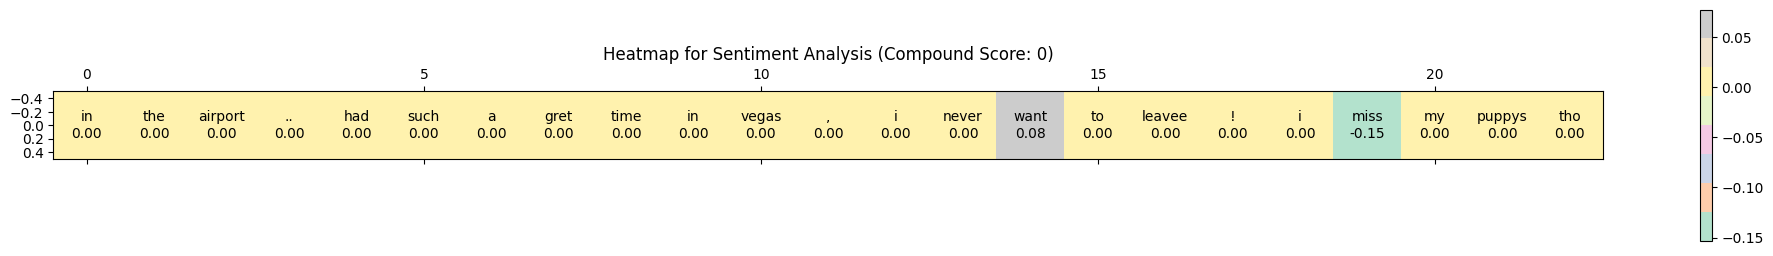

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize

# Exemple de texte
text = data['text'].sample(1).iloc[0]

# Initialiser SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Obtenir les scores de polarité pour chaque mot dans la phrase
words = word_tokenize(text)
scores = [sia.polarity_scores(word)['compound'] for word in words]

# Convertir les scores en tableau numpy
x = np.array([scores])

# Calculer le score global avec un arrondi
polarity_scores1 = sia.polarity_scores(text)
compound_score = round((polarity_scores1['compound'] + 1) / 2)

print(f"Sentiment Analysis using NLTK: \n{text} => {polarity_scores1}")
print(f"Compound score (0 if negative, 1 if positive): {compound_score}")

# Créer la heatmap
fig, ax = plt.subplots(figsize=(25, 3))
cax = ax.matshow(x, cmap="Pastel2")

# Ajouter les annotations
for (i, j), val in np.ndenumerate(x):
    ax.text(j, i, f"{words[j]}\n{val:.2f}", ha='center', va='center')

# Ajouter une barre de couleur
fig.colorbar(cax)

# Ajouter un titre
plt.title(f'Heatmap for Sentiment Analysis (Compound Score: {compound_score})')
plt.show()


##### Fonction donnant le score sia depuis une colonne de dataframe

In [65]:
import numpy as np
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize

def sentiment_scores(df, column_name):
    # Initialiser SentimentIntensityAnalyzer
    sia = SentimentIntensityAnalyzer()
    
    # Fonction pour obtenir le score de polarité global pour une phrase
    def get_compound_score(text):
        polarity_scores = sia.polarity_scores(text)
        compound_score = round((polarity_scores['compound'] + 1) / 2)
        return compound_score
    
    # Appliquer la fonction à la colonne spécifiée du DataFrame
    scores = df[column_name].apply(get_compound_score)
    
    return scores

# Obtenir les scores de sentiment avec un seuil
scores_raw_text = sentiment_scores(data, "text")


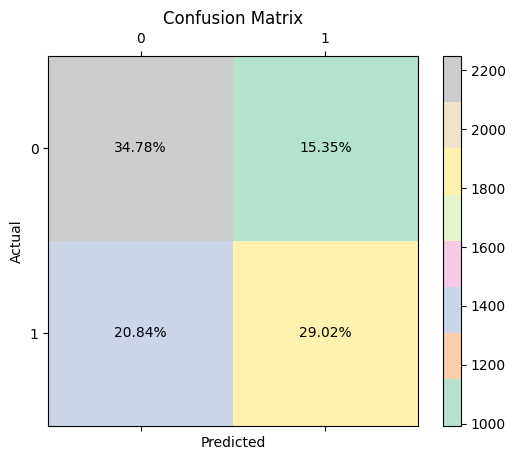

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.69      0.66      3242
           1       0.65      0.58      0.62      3225

    accuracy                           0.64      6467
   macro avg       0.64      0.64      0.64      6467
weighted avg       0.64      0.64      0.64      6467



In [66]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Calculer la matrice de confusion
cm = confusion_matrix(data['target'], scores_raw_text)

# Afficher la matrice de confusion avec des couleurs pastel et des annotations en pourcentage
fig, ax = plt.subplots()
cax = ax.matshow(cm, cmap="Pastel2")

# Ajouter les annotations en pourcentage
for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, f"{val / cm.sum():.2%}", ha='center', va='center')

# Ajouter une barre de couleur
fig.colorbar(cax)

# Ajouter un titre
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Afficher le rapport de classification
report = classification_report(data['target'], scores_raw_text)
print("Classification Report:\n", report)


In [67]:
scores_preprocessed_text = sentiment_scores(data, "preprocessed_text")

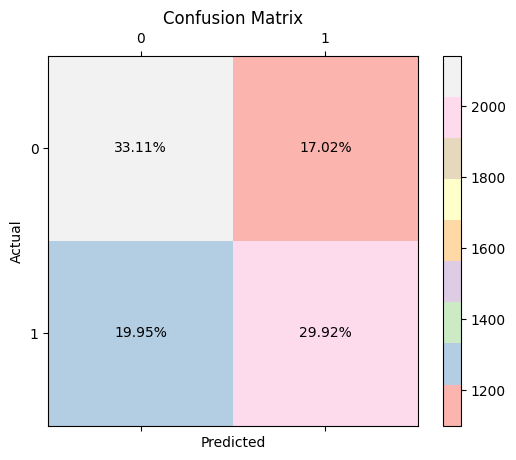

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.66      0.64      3242
           1       0.64      0.60      0.62      3225

    accuracy                           0.63      6467
   macro avg       0.63      0.63      0.63      6467
weighted avg       0.63      0.63      0.63      6467



In [68]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Calculer la matrice de confusion
cm = confusion_matrix(data['target'], scores_preprocessed_text)

# Afficher la matrice de confusion avec des couleurs pastel et des annotations en pourcentage
fig, ax = plt.subplots()
cax = ax.matshow(cm, cmap="Pastel1")

# Ajouter les annotations en pourcentage
for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, f"{val / cm.sum():.2%}", ha='center', va='center')

# Ajouter une barre de couleur
fig.colorbar(cax)

# Ajouter un titre
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Afficher le rapport de classification
report = classification_report(data['target'], scores_preprocessed_text)
print("Classification Report:\n", report)


#### Spacy TextBlob

In [69]:
import pandas as pd
from textblob import TextBlob

def analyse_sentiments_textblob(df, column_name):
    # Fonction pour obtenir le score de sentiment
    def get_sentiment_score(text):
        blob = TextBlob(text)
        polarity = blob.sentiment.polarity
        score = round((polarity + 1) / 2)
        return score
    
    # Appliquer la fonction à la colonne spécifiée du DataFrame
    df['sentiment_score'] = df[column_name].apply(get_sentiment_score)
    
    return df['sentiment_score']


scores_raw_textblob = analyse_sentiments_textblob(data, 'text')

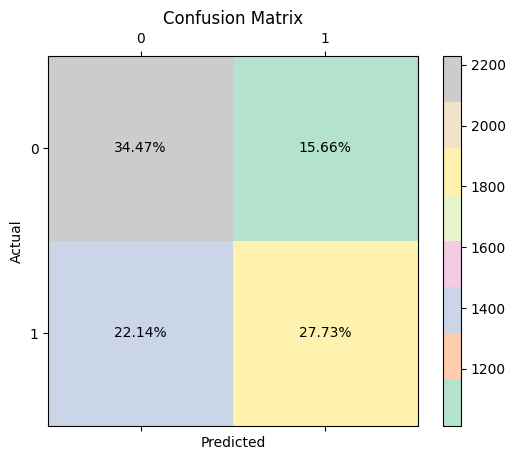

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.69      0.65      3242
           1       0.64      0.56      0.59      3225

    accuracy                           0.62      6467
   macro avg       0.62      0.62      0.62      6467
weighted avg       0.62      0.62      0.62      6467



In [70]:
# Calculer la matrice de confusion
cm = confusion_matrix(data['target'], scores_raw_textblob)

# Afficher la matrice de confusion avec des couleurs pastel et des annotations en pourcentage
fig, ax = plt.subplots()
cax = ax.matshow(cm, cmap="Pastel2")

# Ajouter les annotations en pourcentage
for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, f"{val / cm.sum():.2%}", ha='center', va='center')

# Ajouter une barre de couleur
fig.colorbar(cax)

# Ajouter un titre
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Afficher le rapport de classification
report = classification_report(data['target'], scores_raw_textblob)
print("Classification Report:\n", report)

<div class="alert alert-block alert-danger">
    <b>Le calcul de NLTK (utilisant VADER, outil spécifiquement élaboré pour l'analyse de tweets) est plus rapide et produit beaucoup moins de faux positifs que TextBlob. On peut bien sûr ajuster le seuil de détection pour les minimiser mais l'exactitude de prédiction restera au même niveau. Considérons plutôt qu'il s'agit d'une baseline. A noter également que VADER n'a pas besoin de l'ensemble des pré-traitements que nous avons effectués ; au contraire ils dégradent légèrement le résultat.</b>
</div>

### Préparation des données à la modélisation

Nous allons comparer les performances des modèles sur un échantillon que nous allons séparer en train/test et garder également 25 % des données pour un éventuel test complémentaire.

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Echantillonage
df_sample, test = train_test_split(data, test_size=0.25, stratify=data["target"])

In [72]:
df_sample.shape

(4850, 11)

In [73]:
# Séparation en train/test
train_df, test_df = train_test_split(df_sample, test_size=0.3, stratify=df_sample['target'])

print("Taille de l'ensemble d'entraînement :", len(train_df))
print("Taille de l'ensemble de test :", len(test_df))

Taille de l'ensemble d'entraînement : 3395
Taille de l'ensemble de test : 1455


In [74]:
train_df

,target,ids,date,flag,user,text,cleaned_text,tokenized,preprocessed_text,preprocessed_tokenized,sentiment_score
970039,1,1828003177,Sun May 17 11:53:32 PDT 2009,NO_QUERY,xeniavives,@DitaVonTeese La Duree in the Paris airport???? Good to know,La Duree in the Paris airport?? Good to know,"[La, Duree, in, the, Paris, airport, ?, ?, Good, to, know]",la duree paris airport ? ? good know,"[la, duree, paris, airport, ?, ?, good, know]",1
692250,0,2252448245,Sat Jun 20 06:17:19 PDT 2009,NO_QUERY,cindymanila,"finally, at the airport. currently chilling out at the Citibank lounge. maaaan, the wi fi here doesn't work! lameeee!","Finally, at the airport. Currently chilling out at the Citibank lounge. Maan, the Wi-Fi here doesn't work! Lamee!","[Finally, ,, at, the, airport, ., Currently, chilling, out, at, the, Citibank, lounge, ., Maan, ,, the, Wi-Fi, here, does, n't, work, !, Lamee, !]",finally airport currently chilling citibank lounge maan wi-fi n't work ! lamee !,"[finally, airport, currently, chilling, citibank, lounge, maan, wi-fi, n't, work, !, lamee, !]",0
642603,0,2235544537,Fri Jun 19 01:28:15 PDT 2009,NO_QUERY,k8greene,"Ah man, the new iphone is out today and I have to wait several weeks until I can upgrade","Ah man, the new iphone is out today and I have to wait several weeks until I can upgrade","[Ah, man, ,, the, new, iphone, is, out, today, and, I, have, to, wait, several, weeks, until, I, can, upgrade]",ah man new iphone today wait several week upgrade,"[ah, man, new, iphone, today, wait, several, week, upgrade]",1
138290,0,1880526582,Fri May 22 01:33:33 PDT 2009,NO_QUERY,iGustavo,I'm feeling a little tired I'm so going to sleep in the plane. Brisbane domestic airport --&gt; http://bit.ly/kN3A5,I'm feeling a little tired I'm so going to sleep in the plane. Brisbane domestic airport --&gt;,"[I, 'm, feeling, a, little, tired, I, 'm, so, going, to, sleep, in, the, plane, ., Brisbane, domestic, airport, --, &, gt, ;]",'m feeling little tired 'm going sleep plane brisbane domestic airport -- & gt ;,"['m, feeling, little, tired, 'm, going, sleep, plane, brisbane, domestic, airport, --, &, gt, ;]",0
114481,0,1826311960,Sun May 17 08:12:26 PDT 2009,NO_QUERY,theJingster,"YYZ &gt; SFO. They didn't bump me up to first class - http://bkite.com/07yWF [Airport, Windsor]","YYZ &gt; SFO. They didn't bump me up to first class - [Airport, Windsor]","[YYZ, &, gt, ;, SFO, ., They, did, n't, bump, me, up, to, first, class, -, [, Airport, ,, Windsor, ]]",yyz & gt ; sfo n't bump first class - [ airport windsor ],"[yyz, &, gt, ;, sfo, n't, bump, first, class, -, [, airport, windsor, ]]",1
...,...,...,...,...,...,...,...,...,...,...,...
1122219,1,1974299708,Sat May 30 12:50:44 PDT 2009,NO_QUERY,JanssenPowers,I'm at the L.A. Airport waiting to board. This has been a great week,I'm at the L.A. Airport waiting to board. This has been a great week,"[I, 'm, at, the, L.A., Airport, waiting, to, board, ., This, has, been, a, great, week]",'m la airport waiting board great week,"['m, la, airport, waiting, board, great, week]",1
758547,0,2295781566,Tue Jun 23 08:22:04 PDT 2009,NO_QUERY,SZimms,Hey lunch crew ( @jakesherlock @robweir @mayerjoy ) I am sitting in traffic outside the lake... Looks like I'll be. Little late.,Hey lunch crew ( ) I am sitting in traffic outside the lake. Looks like I'll be. Little late.,"[Hey, lunch, crew, (, ), I, am, sitting, in, traffic, outside, the, lake, ., Looks, like, I, 'll, be, ., Little, late, .]",hey lunch crew ( ) sitting traffic outside lake look like 'll little late,"[hey, lunch, crew, (, ), sitting, traffic, outside, lake, look, like, 'll, little, late]",0
251655,0,1983535455,Sun May 31 13:20:35 PDT 2009,NO_QUERY,Chiklpr,Ok. Officially going. In like 30 minutes the taxi is comming to take me to the airport. Sad. He dont txt me &lt;IwillAlwaysLoveU&gt;,Ok. Officially going. In like 30 minutes the taxi is comming to take me to the airport. Sad. He don't txt me &lt;IwillAlwaysLoveUandgt;,"[Ok., Officially, going, ., I

In [75]:
# Sauvegarde des dataframe train et test
train_df.to_csv('./data/train_df.csv', index=True)
test_df.to_csv('./data/test_df.csv', index=True)